In [1]:
# To work with dataframes
import pandas as pd 

# To perform numerical operations
import numpy as np

# To visualize data
import seaborn as sns

# To partition the data
from sklearn.model_selection import train_test_split

# Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

# Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix


In [2]:
data_income = pd.read_csv('income(1).csv')                                         #,na_values=[" ?"]) 
  
# Creating a copy of original data                                                                              # Additional strings (" ?") to recognize as NA
data = data_income.copy()


In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [4]:
data.isnull() 

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
print('Data columns with null values:\n', data.isnull().sum())

Data columns with null values:
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


In [6]:
summary_num = data.describe()
print(summary_num)  

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [7]:
summary_cate = data.describe(include = "O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [8]:
data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
print(np.unique(data['JobType'])) 
print(np.unique(data['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [10]:
data = pd.read_csv('income(1).csv',na_values=[" ?"]) 

In [11]:
data.isnull().sum()
print(" ")
missing = data[data.isnull().any(axis=1)]

In [12]:
data2 = data.dropna(axis=0)
data3 = data2.copy()
data4 = data3.copy()

In [13]:
correlation = data2.corr()

In [14]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [15]:
gender = pd.crosstab(index = data2["gender"], columns  = 'count', normalize = True)
print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [16]:
gender_salstat = pd.crosstab(index = data2["gender"],columns = data2['SalStat'], margins = True, normalize =  'index') 
                 # Include row and column totals
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


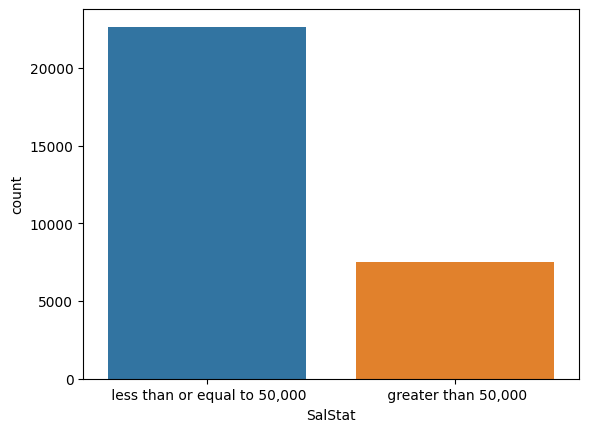

In [17]:
SalStat = sns.countplot(data2['SalStat'])

C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

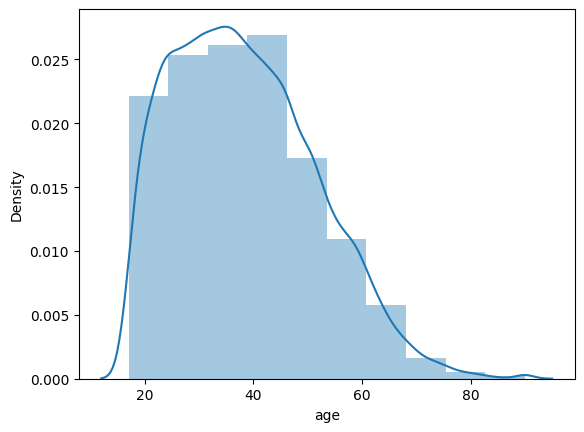

In [18]:
sns.distplot(data2['age'], bins=10, kde=True)

C:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

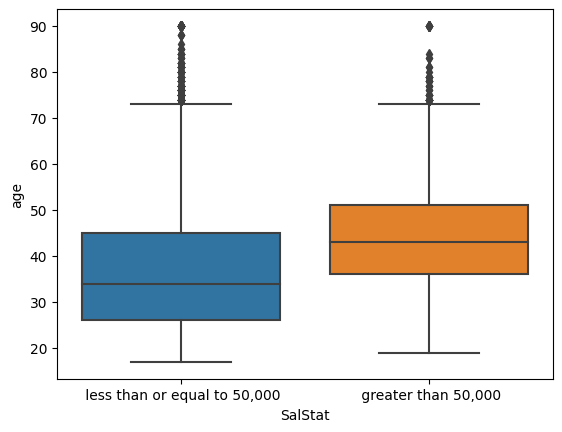

In [19]:
sns.boxplot('SalStat', 'age', data=data2)
data2.groupby('SalStat')['age'].median()

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.7,61.3
Local-gov,29.5,70.5
Private,21.9,78.1
Self-emp-inc,55.9,44.1
Self-emp-not-inc,28.6,71.4
State-gov,26.9,73.1
Without-pay,0.0,100.0
All,24.9,75.1


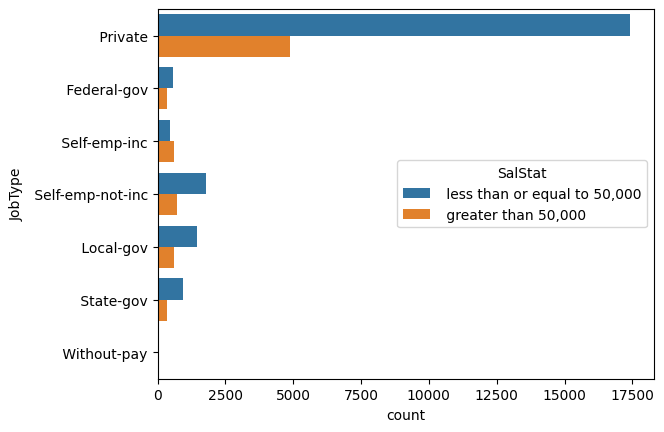

In [20]:
JobType     = sns.countplot(y=data2['JobType'],hue = 'SalStat', data=data2)
job_salstat =pd.crosstab(index = data2["JobType"],columns = data2['SalStat'], margins = True, normalize =  'index')  
round(job_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.2,92.8
11th,5.6,94.4
12th,7.7,92.3
1st-4th,4.0,96.0
5th-6th,4.2,95.8
7th-8th,6.3,93.7
9th,5.5,94.5
Assoc-acdm,25.4,74.6
Assoc-voc,26.3,73.7


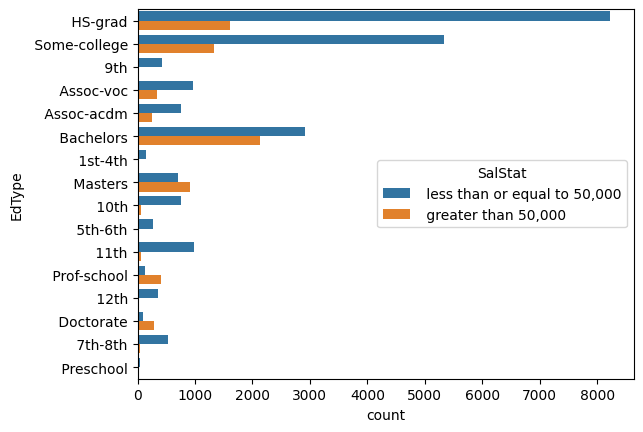

In [21]:
Education   = sns.countplot(y=data2['EdType'],hue = 'SalStat', data=data2)
EdType_salstat = pd.crosstab(index = data2["EdType"], columns = data2['SalStat'],margins = True,normalize ='index')  
round(EdType_salstat*100,1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.4,86.6
Armed-Forces,11.1,88.9
Craft-repair,22.5,77.5
Exec-managerial,48.5,51.5
Farming-fishing,11.6,88.4
Handlers-cleaners,6.1,93.9
Machine-op-inspct,12.5,87.5
Other-service,4.1,95.9
Priv-house-serv,0.7,99.3


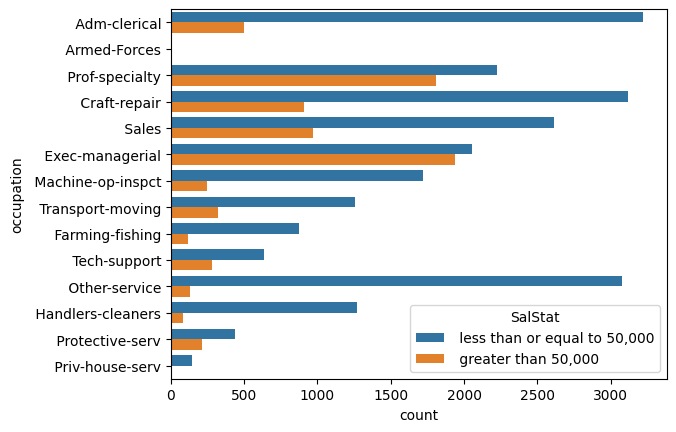

In [22]:
Occupation  = sns.countplot(y=data2['occupation'],hue = 'SalStat', data=data2)
occ_salstat = pd.crosstab(index = data2["occupation"], columns =data2['SalStat'],margins = True,normalize = 'index')  
round(occ_salstat*100,1)


C:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss'>

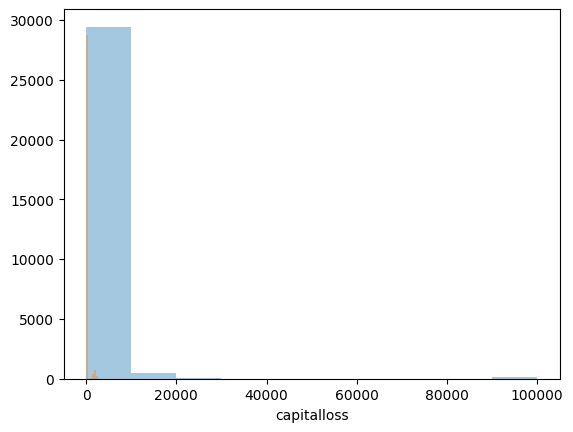

In [23]:
sns.distplot(data2['capitalgain'], bins = 10, kde = False)

sns.distplot(data2['capitalloss'], bins = 10, kde = False)

In [24]:
data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\HAMZA\AppData\Local\Temp\ipykernel_10364\784685041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['SalStat']=data2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})


In [25]:

new_data=pd.get_dummies(data2, drop_first=True)

In [26]:
columns_list=list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [27]:
features=list(set(columns_list)-set(['SalStat']))
print(features)

['maritalstatus_ Widowed', 'nativecountry_ South', 'nativecountry_ Trinadad&Tobago', 'EdType_ Prof-school', 'occupation_ Prof-specialty', 'race_ Black', 'nativecountry_ Thailand', 'nativecountry_ France', 'nativecountry_ Haiti', 'nativecountry_ Germany', 'occupation_ Tech-support', 'EdType_ 11th', 'nativecountry_ Mexico', 'nativecountry_ Greece', 'nativecountry_ Japan', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ El-Salvador', 'nativecountry_ Ecuador', 'gender_ Male', 'nativecountry_ Holand-Netherlands', 'EdType_ Some-college', 'race_ White', 'occupation_ Handlers-cleaners', 'nativecountry_ Puerto-Rico', 'capitalloss', 'nativecountry_ Honduras', 'relationship_ Not-in-family', 'EdType_ 9th', 'nativecountry_ Nicaragua', 'nativecountry_ Portugal', 'JobType_ Private', 'race_ Other', 'maritalstatus_ Never-married', 'nativecountry_ Dominican-Republic', 'maritalstatus_ Married-civ-spouse', 'nativecountry_ Iran', 'age', 'hoursperweek', 'nativecountry_ Ireland', 'JobType_ Without-pa

In [28]:
y=new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [29]:
x = new_data[features].values
print(x)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [31]:
# Make an instance of the Model
logistic = LogisticRegression()

In [32]:
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_


C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.04056706])

In [33]:
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [34]:
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6291  532]
 [ 946 1280]]


In [35]:
accuracy_score=accuracy_score(test_y, prediction)
print(accuracy_score)

0.8366670350314952


In [36]:
print('Misclassified samples: %d' % (test_y != prediction).sum())

Misclassified samples: 1478


In [37]:
data3['SalStat']=data3['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [38]:
cols = ['gender','nativecountry','race','JobType']
new_data = data3.drop(cols,axis = 1)

In [39]:
new_data=pd.get_dummies(new_data, drop_first=True)


In [40]:
columns_list2=list(new_data.columns)
print(columns_list2)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [41]:
features2=list(set(columns_list2)-set(['SalStat']))
print(features2)


['maritalstatus_ Widowed', 'EdType_ Prof-school', 'occupation_ Prof-specialty', 'EdType_ 5th-6th', 'capitalgain', 'EdType_ HS-grad', 'relationship_ Other-relative', 'occupation_ Other-service', 'EdType_ Assoc-voc', 'maritalstatus_ Married-AF-spouse', 'EdType_ 11th', 'occupation_ Tech-support', 'maritalstatus_ Married-spouse-absent', 'EdType_ Some-college', 'occupation_ Handlers-cleaners', 'occupation_ Transport-moving', 'relationship_ Unmarried', 'capitalloss', 'occupation_ Armed-Forces', 'relationship_ Not-in-family', 'occupation_ Priv-house-serv', 'EdType_ 9th', 'occupation_ Machine-op-inspct', 'maritalstatus_ Never-married', 'maritalstatus_ Married-civ-spouse', 'age', 'hoursperweek', 'EdType_ Masters', 'EdType_ 7th-8th', 'relationship_ Wife', 'occupation_ Craft-repair', 'EdType_ Preschool', 'relationship_ Own-child', 'EdType_ Assoc-acdm', 'EdType_ 12th', 'occupation_ Protective-serv', 'EdType_ Doctorate', 'occupation_ Exec-managerial', 'EdType_ Bachelors', 'maritalstatus_ Separated'

In [42]:
y2=new_data['SalStat'].values
print(y2)

[0 0 1 ... 0 0 0]


In [43]:
x2 = new_data[features2].values
print(x2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [44]:
train_x2,test_x2,train_y2,test_y2 = train_test_split(x2,y2,test_size=0.3, random_state=0)

In [45]:
logistic2 = LogisticRegression()

In [46]:

logistic2.fit(train_x2,train_y2)

C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
prediction2 = logistic2.predict(test_x2)

In [48]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (test_y2 != prediction2).sum())

Misclassified samples: 1506
